<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 logistic regression
---


## 핵심 키워드
---

- 로지스틱 회귀
- 다중 분류
- 시그모이드 함수
- 소프트맥스 함수

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 확률로 분류 하기
---


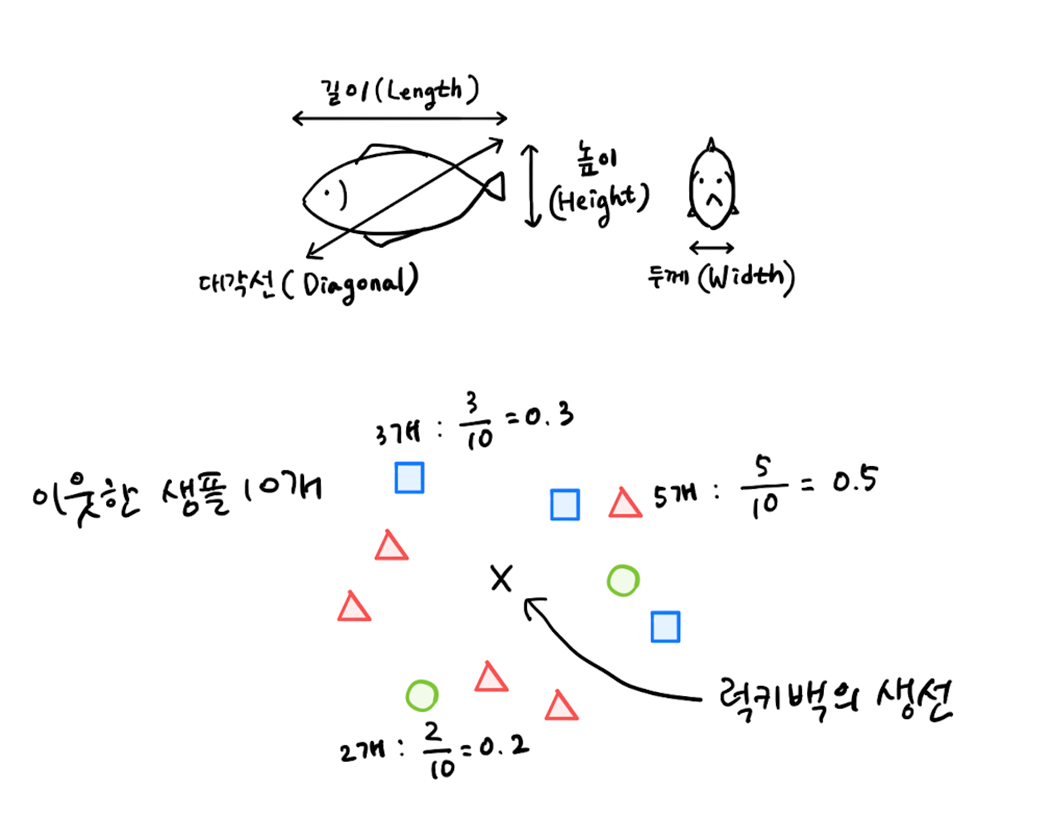

- KNN 이웃의 클래스 비율 계산해서 확률로 출력

### 데이터 준비하기
---

- 7종류의 생선의 무게, 길이, 높이, 두께, 대각선 특성 사용

In [4]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
# 생선의 종류 추출 :  Target
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
# Target 제외한 열 선택
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input.shape

(159, 5)

In [7]:
# 5줄 확인
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [8]:
# Target 생성, 1차원
fish_target = fish['Species'].to_numpy()
fish_target.shape

(159,)

In [9]:
# 훈련 세트와 테스트 세트 생성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [10]:
# 표준화 : 훈련 세트의 통계값으로 테스트 세트 변환
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측
---
- k=3 지정
- 타깃이 7개인 클래스 분류 : 다중 분류 multi-class classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### 예측 확률 predict_proba()
---
- 사이킷런은 문자열 타깃 그대로 사용 가능, 단, 알파벳 순으로  정렬 됨
- .classes_ 속성에 저장되어 있음
- 사이킷런의 분류 모델은 predict_proba() 메소드로 클래스별 확률값 반환
- 예측 확률값 순서는 class_ 속성 순서

In [12]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
# 예측 값 확인
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [14]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
# 4번째 샘플 이웃 클래스 확인 : 0.6667 
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀
---
- 이름은 회귀이지만 분류 모델
- 선형 회귀와 동일하게 선형 방정식 학습
- z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width) + f
- z의 값이 확률이 되어야 함 => 0 ~ 1
- z < -무한대 => 0, z > +무한대 => 1


### 시그모이드 함수 sigmoid function
---
- S자형 곡선 또는 시그모이드 곡선을 갖는 수학 함수

**로지스틱 함수 logistic function**

> **$ S(z) = \frac{1}{1 + e^{-z}} = \frac{e^{z}}{e^z + 1} $**
 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

### 활성화 함수
---
- 여러 종류의 시그모이드 함수는 인공 뉴런의 활성화 함수로 사용 됨

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Gjl-t%28x%29.svg/1024px-Gjl-t%28x%29.svg.png)

- 참고 사이트 :  https://tinyurl.com/cmemcv6w

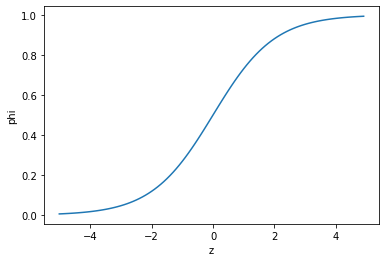

In [16]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [19]:
# Numpy 배열 : 불리언 인덱싱 boolean indexing
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [20]:
# 이진 분류 연습을 위해 도미 Bream와 빙어 Smelt 만 추출
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [21]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [22]:
# 5개 훈련 데이터 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:
# predict_proba() 로 예측 확률 확인, [음성 클래스(0) 확률, 양성 클래스(1) 확률] 
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [25]:
# [음성 클래스(0,  Bream), 양성 클래스(1, Smelt)]  
print(lr.classes_)

['Bream' 'Smelt']


In [26]:
# 회귀 계수 확인 
# 𝑧 = −0.404 × 무게 − 0.576 × 길이 − 0.663 × 대각선 − 0.013 × 높이 − 0.732 × 두께 − 2.161
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [27]:
# decision_function() 으로 z 값 확인 => 이 값을 시그모이드 함수에 넣으면 확률 계산 됨
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# 실제 양성 클래스 확률 계산 해 보기
# 시그모이드 함수 : scipy 모듈의 expit()
from scipy.special import expit

print(expit(decisions))

### LogisticRegression 클래스
---
- 기본적으로 반복적인 알고리즘 사용
- max_iter 매개변수로 반복 횟수 지정, 기본 100회
- 기본적으로 릿지 회귀와 같이 L2 규제 사용
- 규제 제어 변수 C : 릿지의 alpha 값과 반대로 값이 작을 수록 규제가 강해짐, 기본값 1

### 로지스틱 회귀로 다중 분류 수행하기
---
- C=20, max_iter=1000으로 훈련 수행

In [30]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [31]:
# 테스트 세트 5개 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [33]:
# 예측 확률 확인 predict_proba()
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [34]:
# 타겟 확인 classes_ 속성
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [35]:
# 선형 방적식 값 확인
# 5개의 특성을 사용하므로 열은 5개
# 7개의 타깃을 계산해야 하므로 z 값은 7개
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


### 소프트맥스 함수 softmax function
---
- 이진 분류는 시그모이드 함수를 이용해서 z를 0과 1사이로 변환
- 다중 분류는 여러개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축 하고 전체 합이 1이 되도록 만드는 정규화된 지수 함수

> **$ y_k = \frac{exp(a_k)}{{\displaystyle\sum_{i=1}^n}exp(a_i)} $**

> **$ esum = e^{z1} + e^{z2} + ... + e^{z7} $**

> **$ s1 = \frac{e^{z1}}{esum} , s2 = \frac{e^{z2}}{esum} , ... , s7 = \frac{e^{z7}}{esum} $**

In [36]:
# z1 ~ z7 까지의 값 확인 decision_function()
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [37]:
# scipy 모듈 softmax() 함로 계산 해보기
# axist=1 열방향 축 지정
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbcNHRR%2FbtqBPXmTZBh%2FOjPe56tF5LWmQChuKZgPa0%2Fimg.png)